In [ ]:
# Cell 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cell 2: Load and Filter Data for MAR and COST
file_path = '../Data/World-Stock-Prices-Dataset.csv'
df = pd.read_csv(file_path)
df = df[df['Ticker'].isin(['MAR', 'COST'])]
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date').reset_index(drop=True)

/var/folders/7z/y8pyrws50q34y21479y2jl7h0000gn/T/ipykernel_21367/1482476169.py:4: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
# Cell 3: Display Basic Data Information
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Shape: (12941, 13)
Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Brand_Name', 'Ticker', 'Industry_Tag', 'Country', 'Dividends', 'Stock Splits', 'Capital Gains']


,Date,Open,High,Low,Close,Volume,Brand_Name,Ticker,Industry_Tag,Country,Dividends,Stock Splits,Capital Gains
0,2000-01-03 00:00:00-05:00,31.512873,31.512873,30.431443,30.799129,6057400.0,costco,COST,retail,usa,0.0,0.0,NaN
1,2000-01-03 00:00:00-05:00,11.826695,11.850113,11.405149,11.428568,2506717.0,marriott,MAR,hospitality,usa,0.0,0.0,NaN
2,2000-01-04 00:00:00-05:00,30.777503,30.842389,29.047215,29.112101,5722800.0,costco,COST,retail,usa,0.0,0.0,NaN
3,2000-01-04 00:00:00-05:00,11.358310,11.522244,11.264632,11.358310,1036456.0,marriott,MAR,hospitality,usa,0.0,0.0,NaN
4,2000-01-05 00:00:00-05:00,11.358313,11.686181,11.358313,11.545667,960722.0,marriott,MAR,hospitality,usa,0.0,0.0,NaN


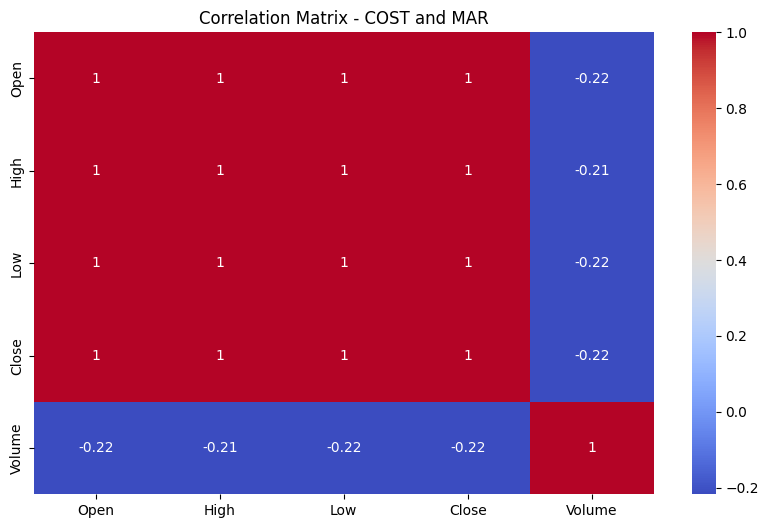

In [ ]:
# Cell 4: Plot Correlation Heatmap of Numerical Features
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - COST and MAR')
plt.show()

In [ ]:
# Cell 5: Drop Irrelevant Columns and Check for Missing Values
columns_to_drop = ['Brand_Name', 'Ticker', 'Industry_Tag', 'Country', 'Capital Gains']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
print("Shape after dropping irrelevant columns:", df.shape)
print("Remaining columns:", df.columns.tolist())
print("\nMissing values per column:")
print(df.isnull().sum())

Shape after dropping irrelevant columns: (12941, 8)
Remaining columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

Missing values per column:
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [ ]:
# Cell 6: Split Data by Ticker (COST and MAR)
cost_df = original_df[original_df['Ticker'] == 'COST'].reset_index(drop=True)
mar_df = original_df[original_df['Ticker'] == 'MAR'].reset_index(drop=True)
print("COST DataFrame shape:", cost_df.shape)
print(cost_df.head())
print("\nMAR DataFrame shape:", mar_df.shape)
print(mar_df.head())

COST DataFrame shape: (6470, 13)
                        Date       Open       High        Low      Close  \
0  2000-01-03 00:00:00-05:00  31.512873  31.512873  30.431443  30.799129   
1  2000-01-04 00:00:00-05:00  30.777503  30.842389  29.047215  29.112101   
2  2000-01-05 00:00:00-05:00  29.220253  29.717711  28.960709  29.609568   
3  2000-01-06 00:00:00-05:00  29.977261  30.842405  29.934003  30.204361   
4  2000-01-07 00:00:00-05:00  30.063773  32.269891  30.042144  32.205006   

      Volume Brand_Name Ticker Industry_Tag Country  Dividends  Stock Splits  \
0  6057400.0     costco   COST       retail     usa        0.0           0.0   
1  5722800.0     costco   COST       retail     usa        0.0           0.0   
2  7726400.0     costco   COST       retail     usa        0.0           0.0   
3  7221400.0     costco   COST       retail     usa        0.0           0.0   
4  5164800.0     costco   COST       retail     usa        0.0           0.0   

   Capital Gains  
0         

In [ ]:
# Cell 7: Prepare DataFrames for Prophet Modeling
def prepare_prophet_df(stock_df):
    prophet_df = stock_df[['Date', 'Close']].copy()
    prophet_df.columns = ['ds', 'y']
    prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], utc=True).dt.tz_localize(None)
    return prophet_df

cost_prophet_df = prepare_prophet_df(cost_df)
mar_prophet_df = prepare_prophet_df(mar_df)

print("COST Prophet-ready format:")
print(cost_prophet_df.head())
print("\nMAR Prophet-ready format:")
print(mar_prophet_df.head())

COST Prophet-ready format:
                   ds          y
0 2000-01-03 05:00:00  30.799129
1 2000-01-04 05:00:00  29.112101
2 2000-01-05 05:00:00  29.609568
3 2000-01-06 05:00:00  30.204361
4 2000-01-07 05:00:00  32.205006

MAR Prophet-ready format:
                   ds          y
0 2000-01-03 05:00:00  11.428568
1 2000-01-04 05:00:00  11.358310
2 2000-01-05 05:00:00  11.545667
3 2000-01-06 05:00:00  11.709596
4 2000-01-07 05:00:00  12.037465


In [55]:
%pip install prophet
from prophet import Prophet

Note: you may need to restart the kernel to use updated packages.


13:55:05 - cmdstanpy - INFO - Chain [1] start processing
13:55:06 - cmdstanpy - INFO - Chain [1] done processing
/Users/muhammad/Development/Stock-Vision/.venv/lib/python3.9/site-packages/prophet/forecaster.py:1418: RuntimeWarning: divide by zero encountered in matmul
  comp = np.matmul(X, beta_c.transpose())
/Users/muhammad/Development/Stock-Vision/.venv/lib/python3.9/site-packages/prophet/forecaster.py:1418: RuntimeWarning: overflow encountered in matmul
  comp = np.matmul(X, beta_c.transpose())
/Users/muhammad/Development/Stock-Vision/.venv/lib/python3.9/site-packages/prophet/forecaster.py:1418: RuntimeWarning: invalid value encountered in matmul
  comp = np.matmul(X, beta_c.transpose())
/Users/muhammad/Development/Stock-Vision/.venv/lib/python3.9/site-packages/prophet/forecaster.py:1562: RuntimeWarning: divide by zero encountered in matmul
  Xb_a = np.matmul(seasonal_features.values,
/Users/muhammad/Development/Stock-Vision/.venv/lib/python3.9/site-packages/prophet/forecaster.py:15

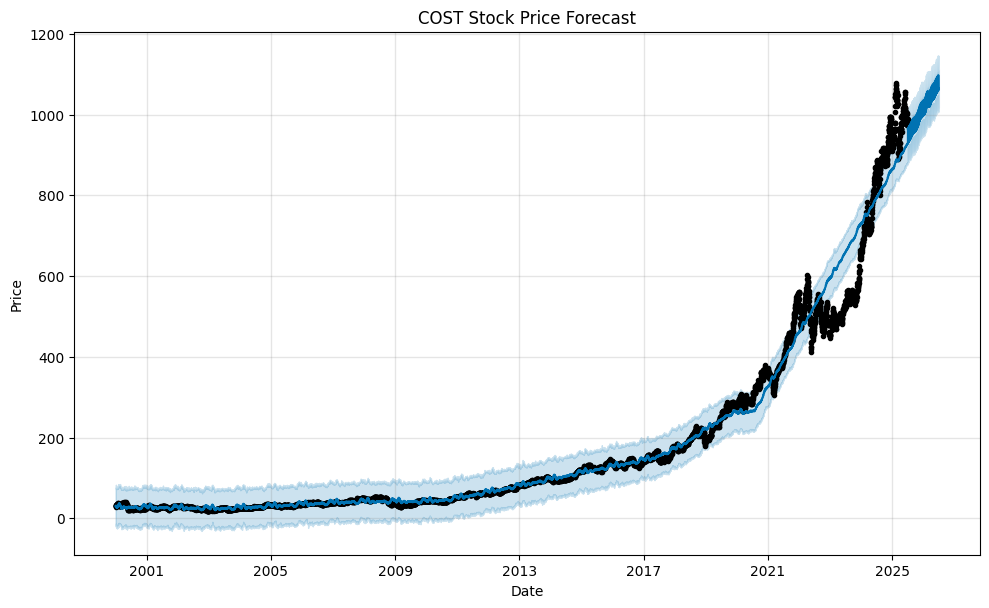

/Users/muhammad/Development/Stock-Vision/.venv/lib/python3.9/site-packages/prophet/forecaster.py:1418: RuntimeWarning: divide by zero encountered in matmul
  comp = np.matmul(X, beta_c.transpose())
/Users/muhammad/Development/Stock-Vision/.venv/lib/python3.9/site-packages/prophet/forecaster.py:1418: RuntimeWarning: overflow encountered in matmul
  comp = np.matmul(X, beta_c.transpose())
/Users/muhammad/Development/Stock-Vision/.venv/lib/python3.9/site-packages/prophet/forecaster.py:1418: RuntimeWarning: invalid value encountered in matmul
  comp = np.matmul(X, beta_c.transpose())


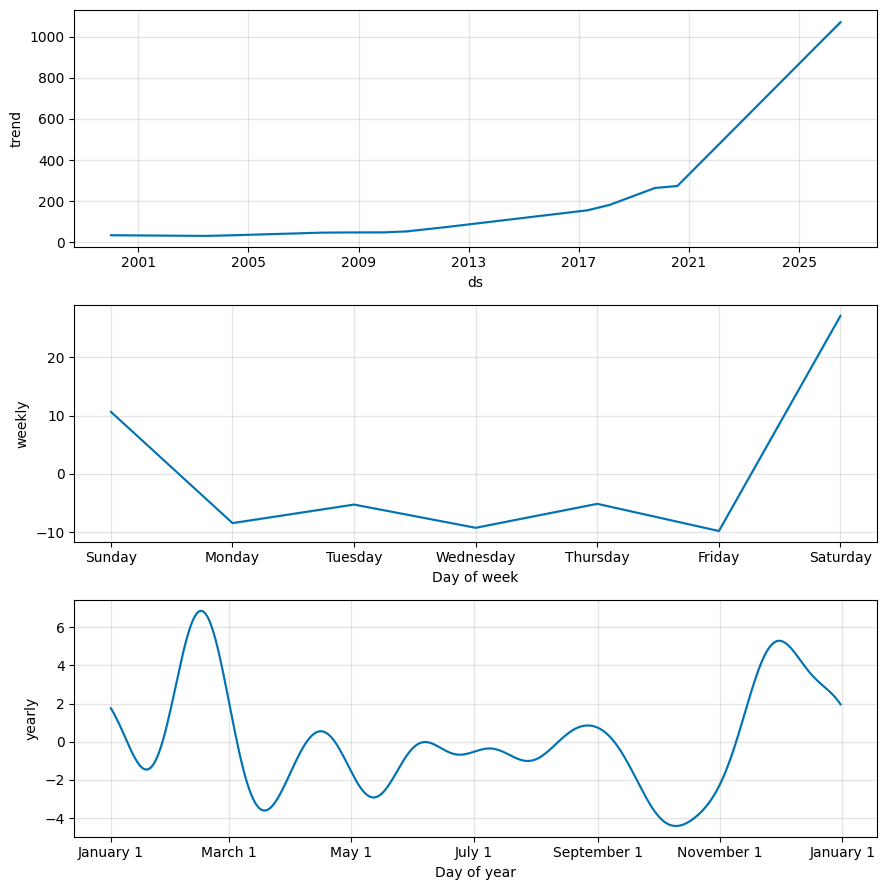

In [ ]:
# Cell 9: Prophet Modeling and Forecasting for COST
cost_model = Prophet()
cost_model.fit(cost_prophet_df)
future_cost = cost_model.make_future_dataframe(periods=365)
forecast_cost = cost_model.predict(future_cost)
cost_model.plot(forecast_cost)
plt.title('COST Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
cost_model.plot_components(forecast_cost)
plt.show()

13:55:24 - cmdstanpy - INFO - Chain [1] start processing
13:55:26 - cmdstanpy - INFO - Chain [1] done processing
/Users/muhammad/Development/Stock-Vision/.venv/lib/python3.9/site-packages/prophet/forecaster.py:1418: RuntimeWarning: divide by zero encountered in matmul
  comp = np.matmul(X, beta_c.transpose())
/Users/muhammad/Development/Stock-Vision/.venv/lib/python3.9/site-packages/prophet/forecaster.py:1418: RuntimeWarning: overflow encountered in matmul
  comp = np.matmul(X, beta_c.transpose())
/Users/muhammad/Development/Stock-Vision/.venv/lib/python3.9/site-packages/prophet/forecaster.py:1418: RuntimeWarning: invalid value encountered in matmul
  comp = np.matmul(X, beta_c.transpose())
/Users/muhammad/Development/Stock-Vision/.venv/lib/python3.9/site-packages/prophet/forecaster.py:1562: RuntimeWarning: divide by zero encountered in matmul
  Xb_a = np.matmul(seasonal_features.values,
/Users/muhammad/Development/Stock-Vision/.venv/lib/python3.9/site-packages/prophet/forecaster.py:15

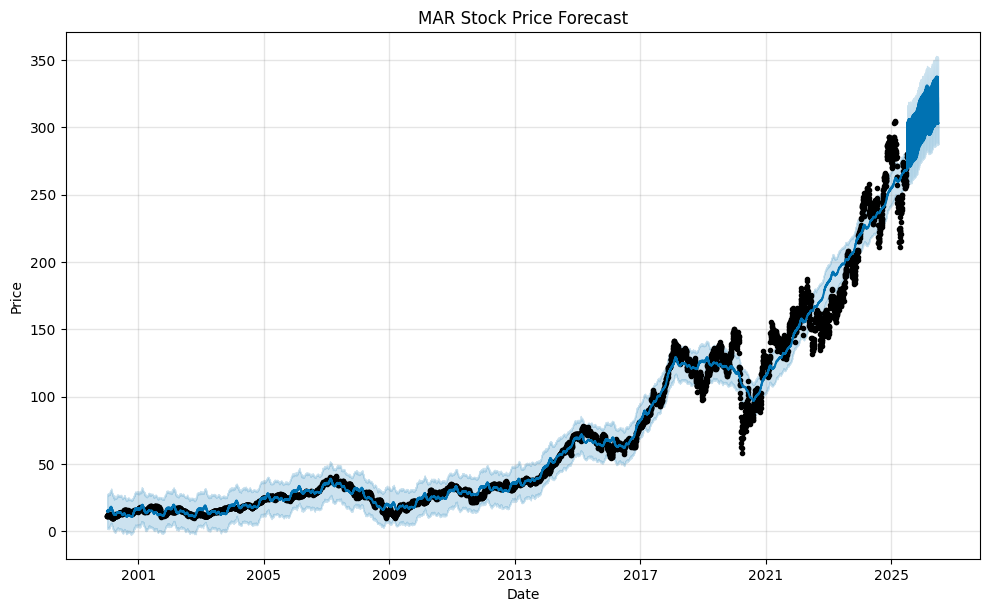

/Users/muhammad/Development/Stock-Vision/.venv/lib/python3.9/site-packages/prophet/forecaster.py:1418: RuntimeWarning: divide by zero encountered in matmul
  comp = np.matmul(X, beta_c.transpose())
/Users/muhammad/Development/Stock-Vision/.venv/lib/python3.9/site-packages/prophet/forecaster.py:1418: RuntimeWarning: overflow encountered in matmul
  comp = np.matmul(X, beta_c.transpose())
/Users/muhammad/Development/Stock-Vision/.venv/lib/python3.9/site-packages/prophet/forecaster.py:1418: RuntimeWarning: invalid value encountered in matmul
  comp = np.matmul(X, beta_c.transpose())


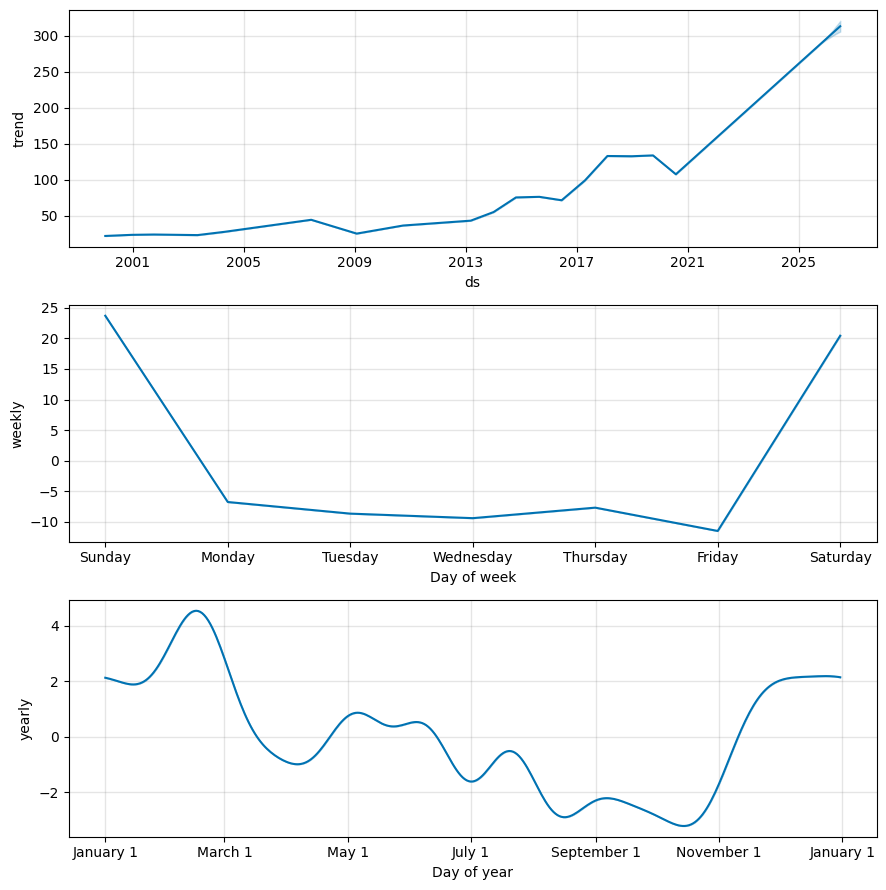

In [ ]:
# Cell 10: Prophet Modeling and Forecasting for MAR
mar_model = Prophet()
mar_model.fit(mar_prophet_df)
future_mar = mar_model.make_future_dataframe(periods=365)
forecast_mar = mar_model.predict(future_mar)
mar_model.plot(forecast_mar)
plt.title('MAR Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
mar_model.plot_components(forecast_mar)
plt.show()